<a href="https://colab.research.google.com/github/FatmaAkacha/MchineLearning/blob/main/Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instruction** **1** **:**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
file_path = '/content/drive/MyDrive/go_mycode/5G_energy_consumption_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display general information about the dataset
print("General Information about the Dataset:")
print(data.info())
print("\nDataset Description:")
print(data.describe())
print("\nFirst Few Rows of the Dataset:")
print(data.head())

General Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81228 entries, 0 to 81227
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     81228 non-null  object 
 1   BS       81228 non-null  int64  
 2   Energy   81228 non-null  float64
 3   load     81228 non-null  float64
 4   ESMODE   81228 non-null  float64
 5   TXpower  81228 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.7+ MB
None

Dataset Description:
                 BS        Energy          load   ESMODE       TXpower
count  81228.000000  81228.000000  81228.000000  81228.0  81228.000000
mean     415.724664     27.276130      0.223784      0.0      6.743150
std      241.030451     11.612207      0.194799      0.0      0.280121
min        0.000000      0.747384      0.000000      0.0      5.949178
25%      206.000000     18.535127      0.062959      0.0      6.427504
50%      419.000000     23.916293 

In [ ]:
# Handle Missing and Corrupted Values
# Checking for missing values
print("Missing Values in the Dataset:")
print(data.isnull().sum())

Missing Values in the Dataset:
Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64


In [ ]:
# Remove duplicates
print("Number of Duplicate Rows in the Dataset:")
print(data.duplicated().sum())
data = data.drop_duplicates()
print("Duplicates removed, if they existed.")

Number of Duplicate Rows in the Dataset:
0
Duplicates removed, if they existed.


In [ ]:
# Handle outliers
# Identifying outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier handling to relevant columns
for col in ['Energy', 'load', 'ESMODE', 'TXpower']:
    data = handle_outliers(data, col)
print("Outliers handled, if they existed.")

Outliers handled, if they existed.


In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
data['BS'] = label_encoder.fit_transform(data['BS'])
print("Categorical features encoded.")

Categorical features encoded.


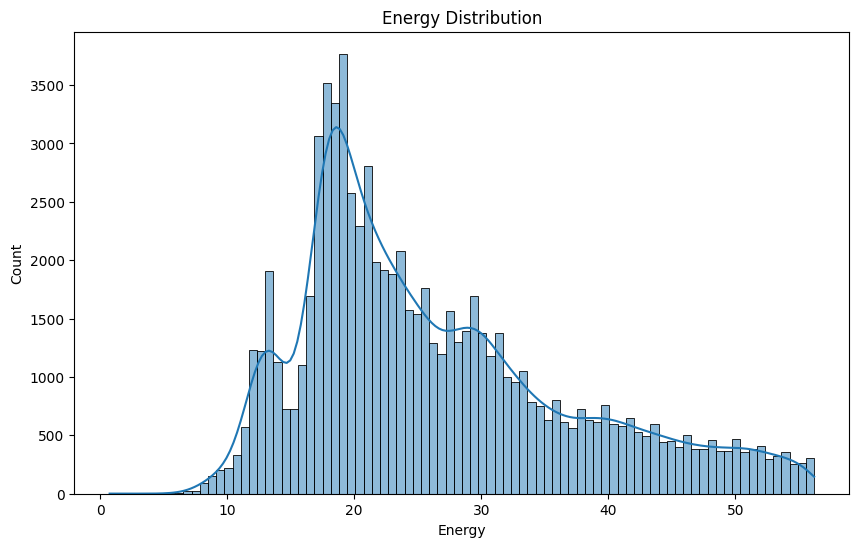

In [ ]:
# Visualize data distributions to gain insights
plt.figure(figsize=(10, 6))
sns.histplot(data['Energy'], kde=True)
plt.title('Energy Distribution')
plt.show()

# **Instruction 2 :**

In [ ]:
# Select target variable and features
target = 'Energy'
features = ['BS', 'load', 'ESMODE', 'TXpower']

X = data[features]
y = data[target]

print("Features and Target Variable Selected:")
print("Features:", features)
print("Target:", target)

Features and Target Variable Selected:
Features: ['BS', 'load', 'ESMODE', 'TXpower']
Target: Energy


# **Instruction 3 :**

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split into Training and Test Sets.")
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Data Split into Training and Test Sets.
Training Set Size: (62704, 4)
Test Set Size: (15676, 4)


# **Instruction** **4 :**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Instruction 5 :**

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate using relevant metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 65.81888958152442
R^2 Score: 0.4268791772966053


# **Instruction 6 :**

**Multi-linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming X_train, X_test, y_train, y_test are already defined
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Multi-linear Regression Mean Squared Error: {mse}")
print(f"Multi-linear Regression R^2 Score: {r2}")


Multi-linear Regression Mean Squared Error: 65.81888958152442
Multi-linear Regression R^2 Score: 0.4268791772966053


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Assuming X_train, X_test, y_train, y_test are already defined
degree = 2  # Example degree, you can choose based on validation
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression (Degree {degree}) Mean Squared Error: {mse}")
print(f"Polynomial Regression (Degree {degree}) R^2 Score: {r2}")


Polynomial Regression (Degree 2) Mean Squared Error: 59.87515090187666
Polynomial Regression (Degree 2) R^2 Score: 0.478634538465292
